In [78]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from keras.applications.resnet50 import preprocess_input

In [79]:
model = load_model('/content/drive/MyDrive/Hiring Challenges/ODN/imageClassification_odn1.h5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 112, 112, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 118, 118, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 56, 56, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 56, 56, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

/content/drive/MyDrive/Hiring Challenges/ODN/test_data/1.jpg
Topwear


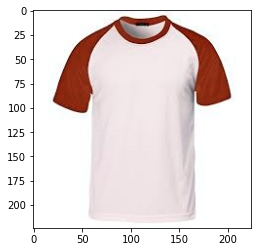

height:  211
width:  183
color:  236 222 225


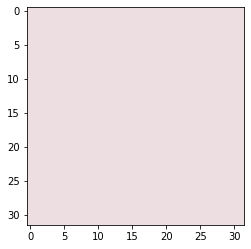

/content/drive/MyDrive/Hiring Challenges/ODN/test_data/2.jpg
Topwear


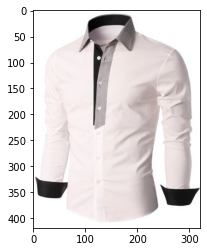

height:  396
width:  315
color:  234 223 222


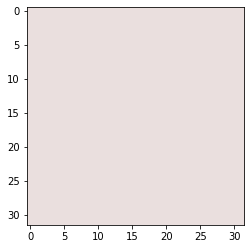

/content/drive/MyDrive/Hiring Challenges/ODN/test_data/3.jpg
Innerwear


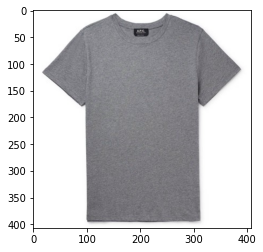

height:  392
width:  371
color:  126 124 130


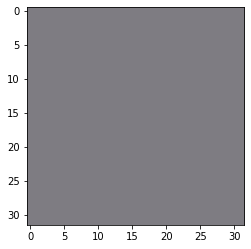

/content/drive/MyDrive/Hiring Challenges/ODN/test_data/4.png
Socks


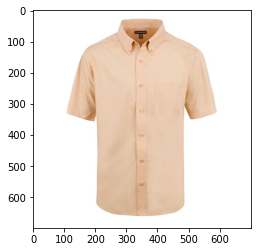

height:  633
width:  480
color:  233 202 178


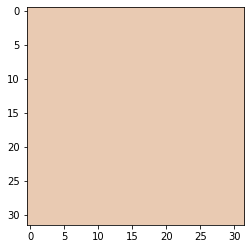

/content/drive/MyDrive/Hiring Challenges/ODN/test_data/5.jpg
Shoes


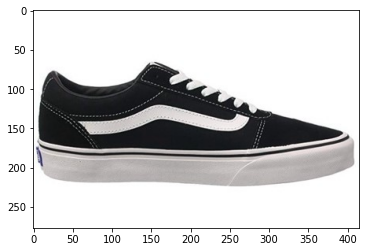

height:  157
width:  404
color:  23 24 28


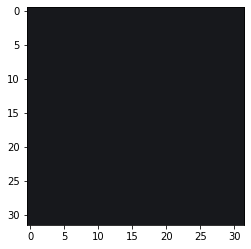

/content/drive/MyDrive/Hiring Challenges/ODN/test_data/6.jpg
Shoes


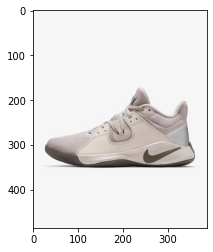

height:  178
width:  335
color:  202 186 179


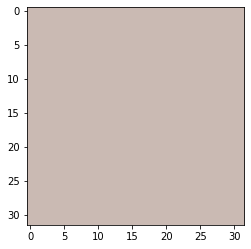

/content/drive/MyDrive/Hiring Challenges/ODN/test_data/7.jpg
Bottomwear


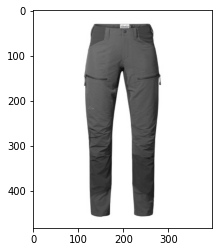

height:  428
width:  170
color:  94 94 94


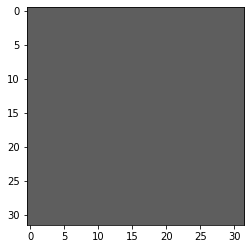

/content/drive/MyDrive/Hiring Challenges/ODN/test_data/8.jpg
Bottomwear


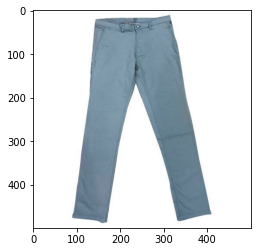

height:  477
width:  318
color:  102 128 143


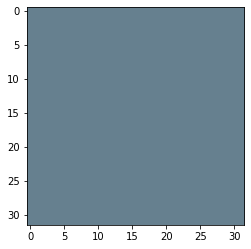

/content/drive/MyDrive/Hiring Challenges/ODN/test_data/9.jpg
Loungewear and Nightwear


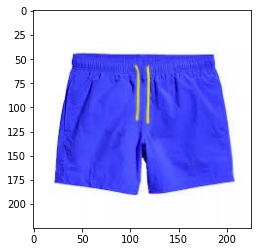

height:  146
width:  185
color:  64 64 255


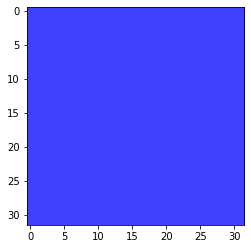

In [83]:
supportedCat = ['Topwear', 'Bottomwear', 'Watches', 'Socks', 'Shoes',  'Flip Flops', 'Bags', 'Innerwear', 'Sandal', 
                'Saree','Dress','Loungewear and Nightwear',  ]
test_data_path = '/content/drive/MyDrive/Hiring Challenges/ODN/test_data/'
files = []
for dir,dnames,fnames in os.walk(test_data_path):
  
  files.extend(fnames)
  break
images = []
for file in files:
  print(test_data_path+file)
  image = cv2.imread(test_data_path+file)
  resized_img = cv2.resize(image,(112,112))
  resized_img = np.expand_dims(resized_img,axis=0)
  resized_img = preprocess_input(resized_img)
  score = model.predict(resized_img)
  print(supportedCat[np.argmax(score[0,:])])
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  thresh = 255-cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY)[1]
  points = np.where(thresh==255)
  y1 = np.min(points[0])
  y2 = np.max(points[0])
  x1 = np.min(points[1])
  x2 = np.max(points[1])
  height = y2-y1
  width = x2-x1

  color_points = image[points]
  r = np.unique(color_points[:,0],axis=0,return_counts=True)
  r_index = r[0][np.argmax(r[1])]
  g = np.unique(color_points[:,1],axis=0,return_counts=True)
  g_index = g[0][np.argmax(g[1])]
  b = np.unique(color_points[:,2],axis=0,return_counts=True)
  b_index = b[0][np.argmax(b[1])]
  
  plt.imshow(image)
  plt.show()
  print('height: ',height)
  print('width: ',width)
  print('color: ', r_index,g_index,b_index)
  color_img = np.zeros((32,32,3),dtype='uint8')
  color_img[:,:,0]= r_index
  color_img[:,:,1]= g_index
  color_img[:,:,2]= b_index
  plt.imshow(color_img)
  plt.show()
